#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Eduardo Espinosa A. </font>

##### <font color="#03997A"> Modulo 7 Aprendizaje de Maquina NO supervisado </font>

##### <font color="#03997A"> Tema 3 Gaussian Mixture Modules Alumno: Ibarra Ramírez Sergio </font>

Importamos las librerias necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture 

Vamos a generar los puntos, procurando que se comporten como 'tipo elipsis agregando una desviación standar '

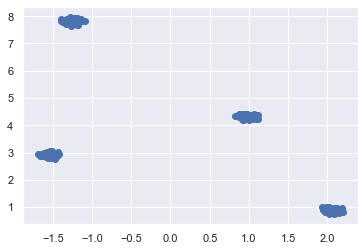

In [2]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.06, random_state=0)
plt.scatter(X[:,0], X[:,1])

Creamos diferentes modelos cambiando el número de clusters

In [3]:
from pandas.core.common import random_state
n_clusters = np.arange(1,21)
models = [GaussianMixture (n,covariance_type='full', random_state=0).fit(X) for n in n_clusters]
models

[GaussianMixture(random_state=0),
 GaussianMixture(n_components=2, random_state=0),
 GaussianMixture(n_components=3, random_state=0),
 GaussianMixture(n_components=4, random_state=0),
 GaussianMixture(n_components=5, random_state=0),
 GaussianMixture(n_components=6, random_state=0),
 GaussianMixture(n_components=7, random_state=0),
 GaussianMixture(n_components=8, random_state=0),
 GaussianMixture(n_components=9, random_state=0),
 GaussianMixture(n_components=10, random_state=0),
 GaussianMixture(n_components=11, random_state=0),
 GaussianMixture(n_components=12, random_state=0),
 GaussianMixture(n_components=13, random_state=0),
 GaussianMixture(n_components=14, random_state=0),
 GaussianMixture(n_components=15, random_state=0),
 GaussianMixture(n_components=16, random_state=0),
 GaussianMixture(n_components=17, random_state=0),
 GaussianMixture(n_components=18, random_state=0),
 GaussianMixture(n_components=19, random_state=0),
 GaussianMixture(n_components=20, random_state=0)]

Se usan los criterios BIC y AIC para identificar que n_cluster es el mejor 

Text(0, 0.5, 'AIC and BIC crieteria values ')

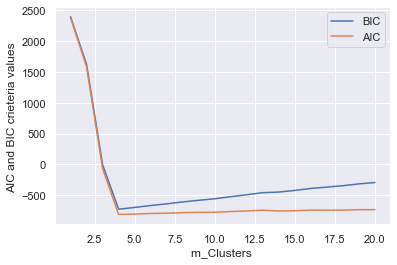

In [6]:
plt.plot(n_clusters,[m.bic(X) for m in models], label='BIC')
plt.plot(n_clusters,[m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('m_Clusters ')
plt.ylabel('AIC and BIC crieteria values')

Ahora si vamos a crer como tal nuestros grupos haciendo uso de GaussianMixture

In [7]:
## Se crea el objeto que guarda el modelo con un número determinado de clusters
gmm = GaussianMixture(n_components=4)
gmm

GaussianMixture(n_components=4)

Vamos a entrenar el modelo GMM con nuestras X  

In [8]:
gmm.fit(X)

GaussianMixture(n_components=4)

Se determina para cada punto de X a que cluster de los n_clusterts definidos pertenence 

In [9]:
labels = gmm.predict(X)
labels

array([0, 2, 1, 2, 0, 0, 3, 1, 2, 2, 3, 2, 1, 2, 0, 1, 1, 0, 3, 3, 0, 0,
       1, 3, 3, 1, 0, 1, 3, 1, 2, 2, 1, 2, 2, 2, 2, 2, 3, 0, 1, 3, 1, 1,
       3, 3, 2, 3, 2, 0, 3, 0, 2, 0, 0, 3, 2, 3, 2, 0, 2, 1, 2, 3, 3, 3,
       2, 0, 2, 3, 1, 3, 2, 3, 3, 2, 3, 1, 0, 2, 0, 1, 0, 0, 2, 1, 0, 1,
       2, 2, 1, 0, 2, 3, 3, 1, 0, 0, 1, 3, 2, 0, 2, 0, 1, 0, 0, 1, 2, 1,
       3, 3, 0, 2, 0, 1, 2, 0, 0, 1, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 2, 3,
       3, 0, 2, 3, 3, 2, 1, 2, 2, 3, 1, 3, 1, 3, 2, 1, 2, 2, 2, 1, 2, 1,
       0, 3, 2, 3, 0, 1, 2, 1, 1, 0, 1, 3, 3, 1, 0, 1, 1, 2, 0, 1, 3, 2,
       0, 0, 1, 3, 0, 1, 3, 3, 1, 1, 1, 1, 0, 2, 1, 3, 1, 1, 3, 3, 3, 1,
       3, 2, 1, 3, 0, 3, 1, 2, 3, 2, 1, 2, 1, 3, 1, 1, 2, 3, 3, 0, 0, 1,
       2, 0, 0, 3, 0, 3, 1, 2, 2, 1, 1, 2, 1, 0, 3, 1, 0, 3, 2, 3, 0, 1,
       0, 2, 2, 2, 2, 3, 3, 2, 1, 3, 0, 1, 3, 3, 3, 0, 0, 2, 1, 1, 3, 0,
       2, 3, 1, 2, 1, 0, 0, 3, 3, 1, 0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0,
       2, 3, 2, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2, 3], d

Podemos graficar el resultado del cluster 

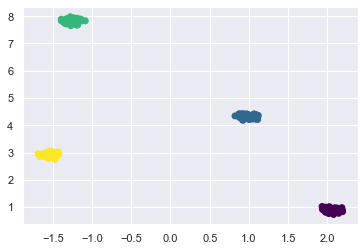

In [11]:
plt.scatter(X[:,0],X[:,1], c=labels,cmap='viridis')